# Data Preparation: Preprocessing

* Data preparation refers to activities that cleanse data and select features/variables/data for data mining/machine learning modeling. 
    - Data cleansing(preprocessing): puts the data into the right shape and good quality for analysis
    - Feature engineering/feature(factor) extraction: selects attributes for modeling. Domain knowledge plays an important role in selecting attributes. It may also involve creating new features. 
* This notebook is meant to introduce several common functions for data cleanse

In [1]:
# -- Load libraries --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleansing
* Identify and deal with missing values
* Remove duplicate records
* Change misleading field values (values out of the possible domain boundary)
* Identify outliers

In [2]:
# -- Read clothing_dirty.csv from https://raw.githubusercontent.com/ttchuang/dataset/master/ --

df = pd.read_csv('https://raw.githubusercontent.com/ttchuang/dataset/master/clothing_dirty.csv')

In [3]:
# -- chacteristics of the DataFrame --
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     int64  
 1   product     10 non-null     object 
 2   size        10 non-null     object 
 3   price       8 non-null      float64
 4   in_stock    9 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 532.0+ bytes


In [4]:
# -- Preview Variables --
df.columns

Index(['Unnamed: 0', 'product', 'size', 'price', 'in_stock'], dtype='object')

In [5]:
# -- Data Preview --
df

,Unnamed: 0,product,size,price,in_stock
0,0,red shirt,M,49.33,True
1,1,red shirt,M,49.33,True
2,2,red shirt,L,NaN,True
3,3,blue shirt,L,45.99,NaN
4,4,white dress,S,199.99,False
5,5,blue pants,M,58.99,True
6,6,white tuxedo,M,NaN,False
7,7,blue pants,N,58.99,True
8,8,black tuxedo,L,4775.50,True
9,9,blue shirt,S,45.99,True


In [6]:
# -- Rename a column with a descriptive name --
# -- We could have droppd this column, but we rename it instead in order to learn how to rename a column --
df.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
df

,index,product,size,price,in_stock
0,0,red shirt,M,49.33,True
1,1,red shirt,M,49.33,True
2,2,red shirt,L,NaN,True
3,3,blue shirt,L,45.99,NaN
4,4,white dress,S,199.99,False
5,5,blue pants,M,58.99,True
6,6,white tuxedo,M,NaN,False
7,7,blue pants,N,58.99,True
8,8,black tuxedo,L,4775.50,True
9,9,blue shirt,S,45.99,True


In [7]:
# -- Drop a column  --
df.drop('index',axis=1, inplace=True)
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,NaN
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,N,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


## Examing Invalid/Misleading values: Show Unique Values

In [8]:
# -- Display values of columns --

df.apply(set)

product     {red shirt, blue pants, black tuxedo, blue shi...
size                                             {M, S, N, L}
price         {nan, 199.99, 4775.5, 45.99, 49.33, 58.99, nan}
in_stock                                   {False, True, nan}
dtype: object

In [9]:
# -- Display values of a column --
# -- Or, use df.unique() --
df['size'].unique()

array(['M', 'L', 'S', 'N'], dtype=object)

In [10]:
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,NaN
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,N,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


## Deal with Misleading Values

In [11]:
# -- revise a value based on the value of the row index -- 
# -- Assume that the size, N, of record whose index is 7 should be M, --
df.loc[df.index.values==7,'size']='M'
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,NaN
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


In [12]:
# -- Counts of unique values in a column --
df['size'].value_counts()

size
M    5
L    3
S    2
Name: count, dtype: int64

In [13]:
# -- Preview data --
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,NaN
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


## Identify and Deal with Missing Data

* pd.isnull()
* pd.notnull()


### Identify Missing Data

In [14]:
# -- Identify missing values --
df.isnull()

,product,size,price,in_stock
0,False,False,False,False
1,False,False,False,False
2,False,False,True,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False
6,False,False,True,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [15]:
# -- Find number of missing values of each column: Summarize missing data --
df.isnull().sum()

product     0
size        0
price       2
in_stock    1
dtype: int64

In [16]:
# -- Identify columns that have missing values --
df.isnull().any(axis=0)

product     False
size        False
price        True
in_stock     True
dtype: bool

In [17]:
# -- Identify records that have missing values --
df.isnull().any(axis=1)

0    False
1    False
2     True
3     True
4    False
5    False
6     True
7    False
8    False
9    False
dtype: bool

In [18]:
# -- Identify and display records that have missing values --
df[df.isnull().any(axis=1)]

,product,size,price,in_stock
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,NaN
6,white tuxedo,M,NaN,False


In [19]:
# -- Identify and display records that have no missing values --
df[~df.isnull().any(axis=1)]

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


### Handle missing data
* Options:
    - Remove the rows/columns with missing values: Be careful because it may miss too much useful information
    - Replace missing values with a placeholder value
    - Replace missing values with a calculated value, such as mean, median, etc. 
* Functions: 
    * pd.dropna()
    * pd.fillna()
    * df.fillna(method='pad'): using previous value to fill nan
* References:
    - Barga, Fontama and Tok (2015)
    - https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/


In [20]:
# -- Drop the incomplete rows, which are those have missing data NaN. --
# -- NOT a good approach unless there are legitimate reasons for doing so -- 
print(df)
df.dropna()

        product size    price in_stock
0     red shirt    M    49.33     True
1     red shirt    M    49.33     True
2     red shirt    L      NaN     True
3    blue shirt    L    45.99      NaN
4   white dress    S   199.99    False
5    blue pants    M    58.99     True
6  white tuxedo    M      NaN    False
7    blue pants    M    58.99     True
8  black tuxedo    L  4775.50     True
9    blue shirt    S    45.99     True


,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


In [21]:
# -- Drop the incomplete columns --
# -- NOT a good idea either. However, it might be necessary under certain circumstances, --
# -- such as when one column has too many missing values. -- 
print(df)
df.dropna(axis=1)

        product size    price in_stock
0     red shirt    M    49.33     True
1     red shirt    M    49.33     True
2     red shirt    L      NaN     True
3    blue shirt    L    45.99      NaN
4   white dress    S   199.99    False
5    blue pants    M    58.99     True
6  white tuxedo    M      NaN    False
7    blue pants    M    58.99     True
8  black tuxedo    L  4775.50     True
9    blue shirt    S    45.99     True


,product,size
0,red shirt,M
1,red shirt,M
2,red shirt,L
3,blue shirt,L
4,white dress,S
5,blue pants,M
6,white tuxedo,M
7,blue pants,M
8,black tuxedo,L
9,blue shirt,S


In [22]:
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,NaN
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


In [23]:
# -- The row with index 3 has a missing value of in_stock, NaN --
# -- Assume we check the data and it should be true --
# -- Then, --
df.loc[df.index==3,'in_stock'] = True
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,True
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


In [24]:
# -- Preview data --
df

,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,NaN,True
3,blue shirt,L,45.99,True
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,NaN,False
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


#### Fill missing data with 0

In [25]:
# -- Fill with 0 temperorily -- 
print(df)
df.fillna(value=0)

        product size    price in_stock
0     red shirt    M    49.33     True
1     red shirt    M    49.33     True
2     red shirt    L      NaN     True
3    blue shirt    L    45.99     True
4   white dress    S   199.99    False
5    blue pants    M    58.99     True
6  white tuxedo    M      NaN    False
7    blue pants    M    58.99     True
8  black tuxedo    L  4775.50     True
9    blue shirt    S    45.99     True


C:\Users\chuang\AppData\Local\Temp\ipykernel_34360\323201502.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(value=0)


,product,size,price,in_stock
0,red shirt,M,49.33,True
1,red shirt,M,49.33,True
2,red shirt,L,0.00,True
3,blue shirt,L,45.99,True
4,white dress,S,199.99,False
5,blue pants,M,58.99,True
6,white tuxedo,M,0.00,False
7,blue pants,M,58.99,True
8,black tuxedo,L,4775.50,True
9,blue shirt,S,45.99,True


#### Fill missing data with average

In [26]:
# -- Fill with the average --

df.fillna(value=df['price'].mean(),inplace=True)
df

,product,size,price,in_stock
0,red shirt,M,49.33000,True
1,red shirt,M,49.33000,True
2,red shirt,L,660.51375,True
3,blue shirt,L,45.99000,True
4,white dress,S,199.99000,False
5,blue pants,M,58.99000,True
6,white tuxedo,M,660.51375,False
7,blue pants,M,58.99000,True
8,black tuxedo,L,4775.50000,True
9,blue shirt,S,45.99000,True


## Remove duplicate records

* **Note**
    - drop_duplicates() doesn't truly drop duplicate records --
    - Instead, it is similar to SQL statements that create a veiw of the results --

In [27]:
# -- Preview the data --
df


,product,size,price,in_stock
0,red shirt,M,49.33000,True
1,red shirt,M,49.33000,True
2,red shirt,L,660.51375,True
3,blue shirt,L,45.99000,True
4,white dress,S,199.99000,False
5,blue pants,M,58.99000,True
6,white tuxedo,M,660.51375,False
7,blue pants,M,58.99000,True
8,black tuxedo,L,4775.50000,True
9,blue shirt,S,45.99000,True


In [28]:
# -- Find duplicate records --

df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7     True
8    False
9    False
dtype: bool

In [29]:
# -- How many duplicated records? --
df.duplicated().sum()

np.int64(2)

In [30]:
# -- Which records are duplicates? --
df[df.duplicated()]

,product,size,price,in_stock
1,red shirt,M,49.33,True
7,blue pants,M,58.99,True


In [31]:
# -- Which records are non-duplicates? --
df[~df.duplicated()]

,product,size,price,in_stock
0,red shirt,M,49.33000,True
2,red shirt,L,660.51375,True
3,blue shirt,L,45.99000,True
4,white dress,S,199.99000,False
5,blue pants,M,58.99000,True
6,white tuxedo,M,660.51375,False
8,black tuxedo,L,4775.50000,True
9,blue shirt,S,45.99000,True


In [32]:
# -- What records are not duplicates by one particular column? --
df[~df['product'].duplicated()]

,product,size,price,in_stock
0,red shirt,M,49.33000,True
3,blue shirt,L,45.99000,True
4,white dress,S,199.99000,False
5,blue pants,M,58.99000,True
6,white tuxedo,M,660.51375,False
8,black tuxedo,L,4775.50000,True


In [33]:
# -- Remove duplicate records and keep the first one --
df.drop_duplicates(inplace=True)

In [34]:
# -- Display the data to confirm duplicates being removed. --
df

,product,size,price,in_stock
0,red shirt,M,49.33000,True
2,red shirt,L,660.51375,True
3,blue shirt,L,45.99000,True
4,white dress,S,199.99000,False
5,blue pants,M,58.99000,True
6,white tuxedo,M,660.51375,False
8,black tuxedo,L,4775.50000,True
9,blue shirt,S,45.99000,True


## Save a Clean Copy for Further Processing


In [35]:
# -- Save the data for Dimenstion Reduction -- 
df_saved_copy = df.reset_index()
df_saved_copy

,index,product,size,price,in_stock
0,0,red shirt,M,49.33000,True
1,2,red shirt,L,660.51375,True
2,3,blue shirt,L,45.99000,True
3,4,white dress,S,199.99000,False
4,5,blue pants,M,58.99000,True
5,6,white tuxedo,M,660.51375,False
6,8,black tuxedo,L,4775.50000,True
7,9,blue shirt,S,45.99000,True


In [36]:
# -- Save the data for Dimenstion Reduction -- 
df_saved_copy.drop(['index'],axis=1,inplace=True) 
df_saved_copy.to_csv('clothing_processed.csv')

## Identify Outliners:
* Z-score
* IQR
* Box plot
* Scatter plot

### Z-Score
* Once numerical data is standardized, the z-score can be used to identify outliers. A rule of thumb is that a data value that is greater than 3 or less than -3 is considered an an outlier. 

In [37]:
# -- Standardize price --

from scipy import stats
df['price_z'] = stats.zscore(df['price'])

In [38]:
# -- Preview data --
df

,product,size,price,in_stock,price_z
0,red shirt,M,49.33000,True,-0.502248
2,red shirt,L,660.51375,True,-0.099813
3,blue shirt,L,45.99000,True,-0.504447
4,white dress,S,199.99000,False,-0.403046
5,blue pants,M,58.99000,True,-0.495887
6,white tuxedo,M,660.51375,False,-0.099813
8,black tuxedo,L,4775.50000,True,2.609701
9,blue shirt,S,45.99000,True,-0.504447


In [39]:
# -- We want to consider any data values that have z-score 
# -- greater than 2.5 standard deviation as outliers. --
df[(df['price_z']>2.5) | (df['price_z']<-2.5)]

,product,size,price,in_stock,price_z
8,black tuxedo,L,4775.5,True,2.609701


### Box Plot
* In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.

Text(0, 0.5, 'Price')

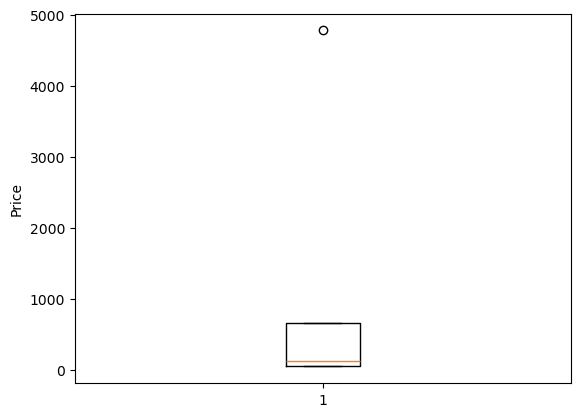

In [40]:
# -- Use Box-plot --
plt.boxplot(df['price'],vert=True)
plt.ylabel('Price')

## A Simple Example of Box Plot

### Example without Outliers 

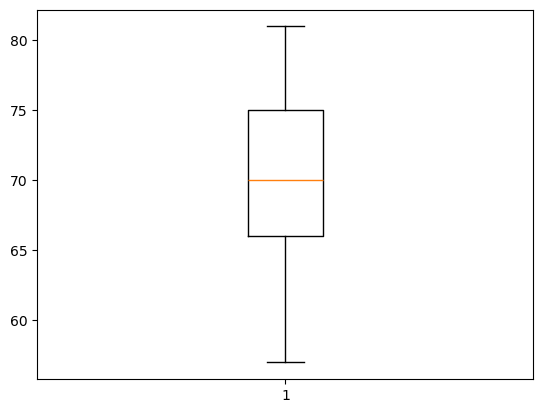

In [41]:
# -- Temperature Data --
data = np.array([57, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 81])
plt.boxplot(data,vert=True);


### Example with Outliers

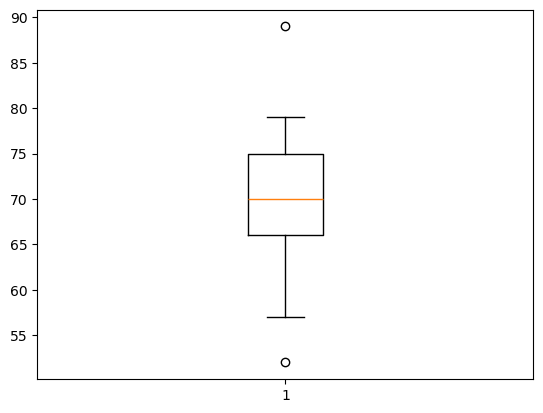

In [42]:
# -- Temperature Data --
data = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
plt.boxplot(data,vert=True);


In [43]:
df

,product,size,price,in_stock,price_z
0,red shirt,M,49.33000,True,-0.502248
2,red shirt,L,660.51375,True,-0.099813
3,blue shirt,L,45.99000,True,-0.504447
4,white dress,S,199.99000,False,-0.403046
5,blue pants,M,58.99000,True,-0.495887
6,white tuxedo,M,660.51375,False,-0.099813
8,black tuxedo,L,4775.50000,True,2.609701
9,blue shirt,S,45.99000,True,-0.504447
